In [1]:
import requests, os

def download(filename, url):
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return (str(filename) + " already exists!")

    # Write the code to download the file from URL
    # and save it in `filename`
    r = requests.get(url)
    r.raise_for_status()
    data = r.text
    f = open(filename, "w", encoding="utf-8")
    f.write(data)
    f.close()
    
    return (str(filename) + " created!")

download('lint.py', "https://github.com/tylerharter/cs301-projects/blob/master/linter/lint.py")
from lint import lint

In [2]:
#q1
import pandas as pd

download('countries.json', "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/countries.json")
countries = pd.read_json('countries.json')
len(countries.country.unique())

174

In [3]:
#q2
countries.population.sum()

6261901793

In [4]:
#q3
download('capitals.json', "https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/capitals.json")
capitals = pd.read_json('capitals.json')
sorted(capitals.capital)

['Abu Dhabi',
 'Abuja',
 'Accra',
 'Addis Ababa',
 'Algiers',
 'Amman',
 'Amsterdam',
 'Ankara',
 'Antananarivo',
 'Apia',
 'Ashgabat',
 'Asmara',
 'Astana',
 'Asuncion',
 'Athens',
 'Baghdad',
 'Baku',
 'Bamako',
 'Bangkok',
 'Beijing',
 'Beirut',
 'Belmopan',
 'Berlin',
 'Bern',
 'Bishkek',
 'Bissau',
 'Bogota',
 'Brasilia',
 'Bridgetown',
 'Brussels',
 'Bucharest',
 'Budapest',
 'Buenos Aires',
 'Bujumbura',
 'Cairo',
 'Canberra',
 'Caracas',
 'Castries',
 'Chisinau',
 'Colombo',
 'Conakry',
 'Copenhagen',
 'Dakar',
 'Damascus',
 'Dar es Salaam',
 'Dhaka',
 'Djibouti',
 'Doha',
 'Dublin',
 'Dushanbe',
 'Freetown',
 'Gaborone',
 'George Town',
 'Georgetown',
 'Guatemala City',
 'Hagatna',
 'Hamilton',
 'Hanoi',
 'Harare',
 'Havana',
 'Helsinki',
 'Islamabad',
 'Jakarta',
 'Jamestown',
 'Jerusalem',
 'Kabul',
 'Kampala',
 'Kathmandu',
 'Khartoum',
 'Kigali',
 'Kingston',
 'Kingstown',
 'Kuala Lumpur',
 'Kuwait City',
 'Kyiv',
 'La Paz',
 'Libreville',
 'Lilongwe',
 'Lima',
 'Lisbon',


In [5]:
capitals

,country,capital,latitude,longitude
0,Afghanistan,Kabul,34.516667,69.183333
1,Albania,Tirana,41.316667,19.816667
2,Algeria,Algiers,36.750000,3.050000
3,Anguilla,The Valley,18.216667,-63.050000
4,Argentina,Buenos Aires,-34.583333,-58.666667
...,...,...,...,...
169,Venezuela,Caracas,10.483333,-66.866667
170,Vietnam,Hanoi,21.033333,105.850000
171,Yemen,Sanaa,15.350000,44.200000
172,Zambia,Lusaka,-15.416667,28.283333


In [6]:
#q4
# for the first row in DataFrame or only one row
# capitals[capitals.country == "Italy"].capital.iloc[0]
capitals[capitals.country == "Italy"].capital.item()

'Rome'

In [7]:
#q5
capitals[capitals.capital == "Brussels"].country.item()

'Belgium'

In [8]:
#q6
capitals.sort_values(by=["latitude"]).iloc[:7].country.to_list()
# list(capitals.sort_values(by=["latitude"]).iloc[:7].country.values)
# [v for k, v in capitals.sort_values(by=["latitude"]).iloc[:7].country.items()]

['New Zealand',
 'Australia',
 'Uruguay',
 'Argentina',
 'Chile',
 'Lesotho',
 'Swaziland']

In [9]:
#q7
capitals.sort_values(by=["latitude"], ascending = False).iloc[:10].country.to_list()

['Iceland',
 'Finland',
 'Norway',
 'Estonia',
 'Sweden',
 'Latvia',
 'Russia',
 'Denmark',
 'Lithuania',
 'Belarus']

In [10]:
#q8
rp = (43.070231,-89.411893)
ws = (43.074645,-89.384113)

from haversine import haversine, Unit
# haversine(rp, ws, unit=Unit.MILES)

import math

(lat1, lon1) = rp
(lat2, lon2) = ws
[lon1, lat1, lon2, lat2] = map(math.radians, [lon1, lat1, lon2, lat2])
dlon = lon2 - lon1
dlat = lat2 - lat1
a = (math.sin(dlat/2))**2 + math.cos(lat1) * math.cos(lat2) * (math.sin(dlon/2))**2
c = 2 * math.asin(min(1,math.sqrt(a)))
R = 3956
d = R * c
d

1.433899492072933

In [11]:
#q9
# capitals[capitals.country == "Norway"].iloc[0,2:4]
# [tuple(x) for x in capitals[capitals.country == "Norway"][["latitude", "longitude"]].values.tolist()][0]
Norway = capitals[capitals.country == "Norway"][["latitude", "longitude"]].apply(tuple, axis=1).iloc[0]
# tuple(zip(capitals[capitals.country == "Norway"]["latitude"], capitals[capitals.country == "Norway"]["longitude"]))[0]
# (capitals[capitals.country == "Norway"]["latitude"].iloc[0], capitals[capitals.country == "Norway"]["longitude"].iloc[0])

Germany = capitals[capitals.country == "Germany"][["latitude", "longitude"]].apply(tuple, axis=1).iloc[0]
haversine(Norway, Germany, unit=Unit.MILES)

521.2217471002616

In [12]:
#q10
loc = {}
sel = ["Switzerland", "Netherlands", "Spain"]
loc["Switzerland"] = capitals[capitals.country == "Switzerland"][["latitude", "longitude"]].apply(tuple, axis=1).iloc[0]
loc["Netherlands"] = capitals[capitals.country == "Netherlands"][["latitude", "longitude"]].apply(tuple, axis=1).iloc[0]
loc["Spain"] = capitals[capitals.country == "Spain"][["latitude", "longitude"]].apply(tuple, axis=1).iloc[0]
dist = pd.DataFrame(index=sel,columns=sel)
for a in sel:
    for b in sel:
        if a != b: 
            dist[a][b] = haversine(loc[a], loc[b], unit=Unit.MILES)

dist

,Switzerland,Netherlands,Spain
Switzerland,NaN,392.302,715.303
Netherlands,392.302,NaN,920.326
Spain,715.303,920.326,NaN


In [13]:
#q11
loc = {}
sel = countries[countries.continent == "South America"].country.tolist()
for a in sel:
    loc[a] = capitals[capitals.country == a][["latitude", "longitude"]].apply(tuple, axis=1).iloc[0]

dist = pd.DataFrame(index=sel,columns=sel)
for a in sel:
    for b in sel:
        if a != b: 
            dist[a][b] = haversine(loc[a], loc[b], unit=Unit.MILES)   
            
dist            

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Chile,NaN,2899.58,2638.49,2897.83,1871.04,1181.57,3045.78,691.266,1532.55,2351.85,833.985,964.308
Guyana,2899.58,NaN,1105.84,215.487,1710.26,1748.99,647.421,2859.52,1839.14,1484.23,2880.65,2215.83
Colombia,2638.49,1105.84,NaN,1304.31,2277.1,1513.17,639.807,2887.37,1168.32,451.319,2964.3,2339.25
Suriname,2897.83,215.487,1304.31,NaN,1573.77,1780.01,862.058,2801.84,1946.11,1662.86,2811.71,2155.36
Brazil,1871.04,1710.26,2277.1,1573.77,NaN,1343.23,2230.25,1460.16,1969.14,2346.22,1413.08,908.82
Bolivia,1181.57,1748.99,1513.17,1780.01,1343.23,NaN,1866.43,1380.42,670.394,1327.68,1468.28,907.432
Venezuela,3045.78,647.421,639.807,862.058,2230.25,1866.43,NaN,3159.83,1706.61,1088.82,3209.59,2546.58
Argentina,691.266,2859.52,2887.37,2801.84,1460.16,1380.42,3159.83,NaN,1937.82,2698.03,143.17,646.487
Peru,1532.55,1839.14,1168.32,1946.11,1969.14,670.394,1706.61,1937.82,NaN,823.629,2048,1559.72
Ecuador,2351.85,1484.23,451.319,1662.86,2346.22,1327.68,1088.82,2698.03,823.629,NaN,2793.15,2220.2


In [14]:
#q12
dist.mean().sort_values().index.tolist()[0]

'Bolivia'

In [15]:
#q13
dist.mean().sort_values(ascending=False).index.tolist()[0]

'Uruguay'

In [16]:
#q14
pd.concat([dist.astype(float).idxmin(),  dist.min()], axis=1, keys=["nearest","distance"])

,nearest,distance
Chile,Argentina,691.266343
Guyana,Suriname,215.486643
Colombia,Ecuador,451.318925
Suriname,Guyana,215.486643
Brazil,Paraguay,908.819633
Bolivia,Peru,670.393988
Venezuela,Colombia,639.807399
Argentina,Uruguay,143.169807
Peru,Bolivia,670.393988
Ecuador,Colombia,451.318925


In [17]:
#q15
pd.concat([dist.astype(float).idxmax(),  dist.max()], axis=1, keys=["furthest","distance"])

,furthest,distance
Chile,Venezuela,3045.782196
Guyana,Chile,2899.575619
Colombia,Uruguay,2964.298613
Suriname,Chile,2897.832084
Brazil,Ecuador,2346.221468
Bolivia,Venezuela,1866.433063
Venezuela,Uruguay,3209.590944
Argentina,Venezuela,3159.828108
Peru,Uruguay,2048.000119
Ecuador,Uruguay,2793.145008


In [18]:
#optional stage1 q1
download('capitals.html', 'https://raw.githubusercontent.com/msyamkumar/cs220-projects/master/spring20/p10/techslides-snapshot.html')
from bs4 import BeautifulSoup
import codecs
import json

f = codecs.open("capitals.html", "r")
html = f.read()
doc = BeautifulSoup(html, "html.parser")
tb_list = [] 
for a in doc.find("table").find_all("tr")[1:]:
    td_list = a.find_all("td")
    td_dict= {}
    td_dict["country"] = td_list[0].text
    td_dict["capital"] = td_list[1].text
    td_dict["latitude"] = float(td_list[2].text)
    td_dict["longitude"] = float(td_list[3].text)
    tb_list.append(td_dict)
    
# filter countries.json

# JSON string
json_str = json.dumps(tb_list)

# save to file
f = open("capitals_1.json", "w", encoding="utf-8")
f.write(json_str)
f.close()

In [19]:
#optional stage1 q2
countries[(countries.coastline == 0) & (countries.continent == "Africa")].sort_values(by=["area"], ascending = False).iloc[0].country

'Chad'

In [20]:
#optional stage1 q3
countries[(countries.coastline > 0) & (countries.continent == "Asia")].sort_values(by=["area"]).iloc[0].country

'Maldives'

In [21]:
#optional stage1 q4
countries[(countries.coastline > 0) & (countries.continent == "South America")].sort_values(by=["population"], ascending = False).iloc[0].country

'Brazil'

In [22]:
#optional stage1 q5
countries[["birth-rate", "death-rate"]].describe()

,birth-rate,death-rate
count,174.000000,174.000000
mean,22.463851,9.625172
std,11.278992,5.187143
min,8.250000,2.410000
25%,12.597500,6.027500
50%,20.010000,8.230000
75%,29.860000,11.715000
max,50.730000,29.740000


In [23]:
#q16
import sqlite3
conn = sqlite3.connect('countries.db')
countries.to_sql("countries", conn, if_exists="replace", index=False)
capitals.to_sql("capitals", conn, if_exists="replace", index=False)

# remember to do conn.close() at the end of your notebook
df = pd.read_sql("""
    SELECT continent, count() AS 'number of countries'
    FROM countries 
    GROUP BY continent
    ORDER BY count(*) ASC, continent ASC
    """, conn)
df

,continent,number of countries
0,Australia,12
1,South America,12
2,North America,24
3,Asia,38
4,Europe,41
5,Africa,47


Text(0.5, 0, 'continent')

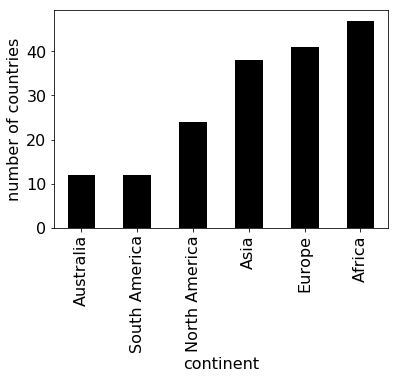

In [24]:
#q17
import matplotlib.pylab as plt
    
ax = df.set_index("continent").plot.bar(color="black", fontsize=16, legend = False)
ax.set_ylabel("number of countries", fontsize=16)
ax.set_xlabel("continent", fontsize=16)

In [25]:
#q18
q18 = pd.read_sql("""
    SELECT continent, sum(area) AS 'total area'
    FROM countries 
    GROUP BY continent
    ORDER BY sum(area) DESC, continent ASC
    """, conn)
q18

,continent,total area
0,Asia,29731231
1,Africa,25199550
2,Europe,23708430
3,North America,22327685
4,South America,17715335
5,Australia,8488612


Text(0.5, 0, 'continent')

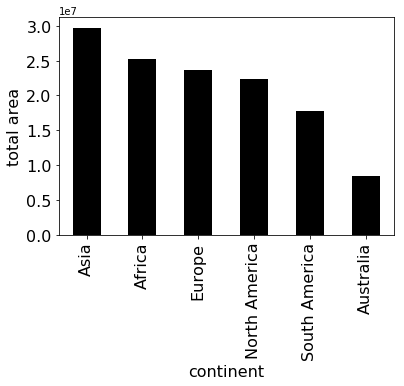

In [26]:
#q19
ax = q18.set_index("continent").plot.bar(color="black", fontsize=16, legend = False)
ax.set_ylabel("total area", fontsize=16)
ax.set_xlabel("continent", fontsize=16)

In [27]:
#q20
q20 = pd.read_sql("""
    SELECT country, area
    FROM countries 
    WHERE continent = 'South America'
    ORDER BY area DESC, country ASC
    """, conn)
q20

,country,area
0,Brazil,8511965
1,Argentina,2766890
2,Peru,1285220
3,Colombia,1138910
4,Bolivia,1098580
5,Venezuela,912050
6,Chile,756950
7,Paraguay,406750
8,Ecuador,283560
9,Guyana,214970


In [28]:
#q21
q21 = pd.read_sql("""
    SELECT country, (population * `gdp-per-capita` / 1000000000.0) AS `real GDP (billion)`
    FROM countries 
    ORDER BY (population * `gdp-per-capita`) DESC, country ASC
    """, conn)

q21[:8]

,country,real GDP (billion)
0,United States,11281.191327
1,China,6569.868565
2,Japan,3594.473830
3,India,3176.520785
4,Germany,2274.855452
5,France,1680.181354
6,United Kingdom,1678.873538
7,Italy,1552.164690


Text(0.5, 0, 'country')

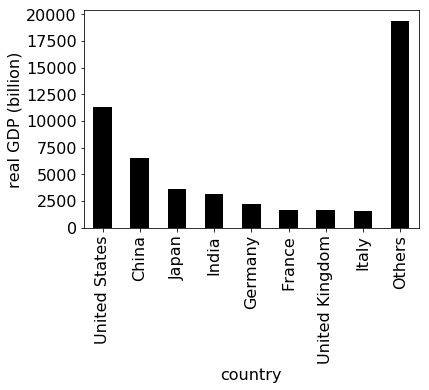

In [29]:
#q22
# q22 = pd.read_sql("""
#     SELECT 'Others' AS country, sum(population * `gdp-per-capita`)/1000000000.0  AS `readl GDP (billion)`
#     FROM countries 
#     WHERE country NOT IN
#         (SELECT country
#         FROM countries 
#         ORDER BY (population * `gdp-per-capita`) DESC, country ASC
#         LIMIT 8)
#     """, conn)

# q22 = pd.read_sql("""
#     SELECT 'Others' AS country, sum(population * `gdp-per-capita`)/1000000000.0  AS `readl GDP (billion)`
#     FROM
#         (SELECT *
#         FROM countries 
#         ORDER BY (population * `gdp-per-capita`) ASC, country ASC
#         LIMIT 174-8)
#      """, conn)

# ax = q21[:8].append(q22).set_index("country").plot.bar(color="black", fontsize=16, legend = False)

b = q21[8:].sum()
b.country = "Others"
ax = q21[:8].append(b, ignore_index=True).set_index("country").plot.bar(color="black", fontsize=16, legend = False)

ax.set_ylabel("real GDP (billion)", fontsize=16)
ax.set_xlabel("country", fontsize=16)

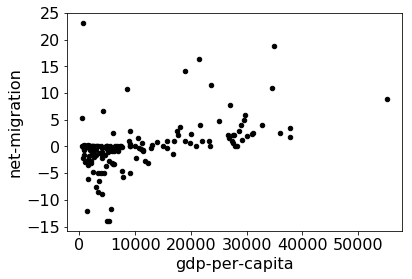

In [30]:
#q23
def scatter(x, y, xlabel="please label me!", ylabel="please label me!"):
    df = pd.DataFrame({"x":x, "y":y})
    ax = df.plot.scatter(x="x", y="y", color="black", fontsize=16)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel(ylabel, fontsize=16)
    ax.get_xaxis().get_major_formatter().set_scientific(False)
    ax.get_yaxis().get_major_formatter().set_scientific(False)    
    
q23 = pd.read_sql("""
    SELECT `gdp-per-capita`, `net-migration`
    FROM countries 
    """, conn)

scatter(getattr(q23, "gdp-per-capita"), getattr(q23, "net-migration"), "gdp-per-capita", "net-migration")

In [31]:
#q24
q23.corr().iloc[0,1]

0.4523211325011283

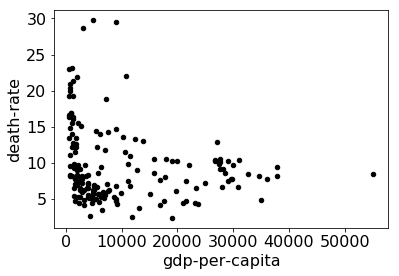

In [32]:
#q25
countries_df = pd.read_sql("""
    SELECT *
    FROM countries 
    """, conn)

scatter(getattr(countries_df, "gdp-per-capita"), getattr(countries_df, "death-rate"), "gdp-per-capita", "death-rate")

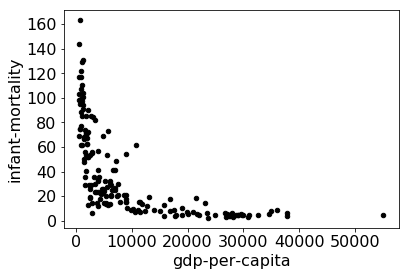

In [33]:
#q26
scatter(getattr(countries_df, "gdp-per-capita"), getattr(countries_df, "infant-mortality"), "gdp-per-capita", "infant-mortality")

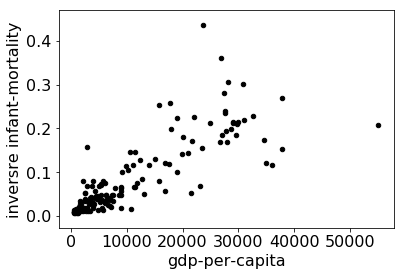

In [34]:
#q27
scatter(getattr(countries_df, "gdp-per-capita"), 1/getattr(countries_df, "infant-mortality"), "gdp-per-capita", "inversre infant-mortality")

(6.482983154848297e-06, 0.013237849092120857)

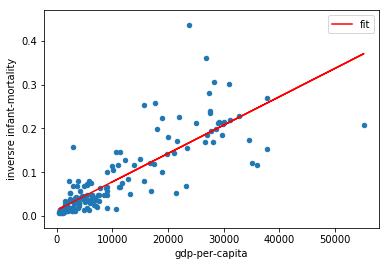

In [35]:
#q28
import numpy as np

df = pd.DataFrame({
    "gdp-per-capita": getattr(countries_df, "gdp-per-capita"),
    "inversre infant-mortality": 1/getattr(countries_df, "infant-mortality")
})
df["1"] = 1

res = np.linalg.lstsq(df[["gdp-per-capita", "1"]], df["inversre infant-mortality"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
ax = df.plot.scatter(x='gdp-per-capita', y='inversre infant-mortality')

df["fit"] = df["gdp-per-capita"] * m + n
df.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)
(m,n)

In [36]:
#q29
1/(m*50000+n)

2.963955279079342

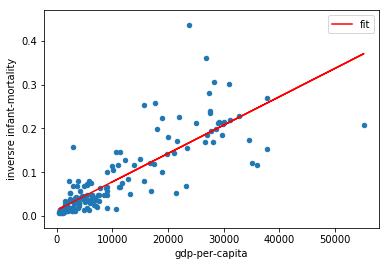

In [37]:
#q30
ax.figure

In [38]:
conn.close()